In [2]:
import control
import sympy
import numpy as np
import matplotlib.pyplot as plt
sympy.init_printing()
plt.rcParams['figure.figsize']=(10, 5)

## Original System

In [3]:
s = control.tf([1, 0], [0, 1])

In [4]:
G = 1/((s+2)*s)
G

TransferFunction(array([1]), array([1, 2, 0]))

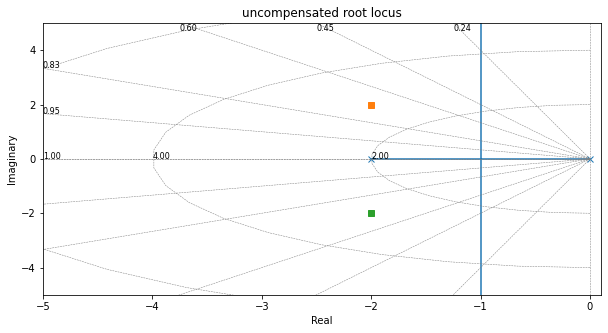

In [5]:
control.rlocus(G, xlim=[-5, 0.1], ylim=[-5, 5]);
plt.title('uncompensated root locus')
sd = -2 + 2j

plt.plot(np.real(sd), np.imag(sd), 's')
plt.plot(np.real(sd), -np.imag(sd), 's')

1 states have been removed from the model


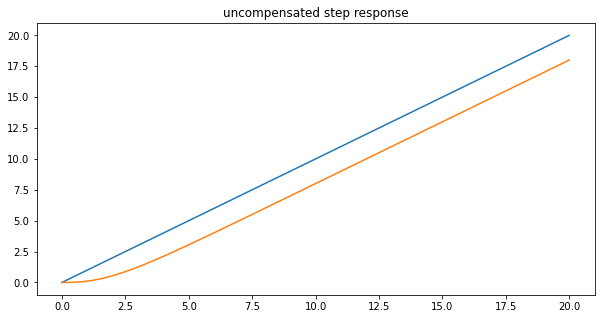

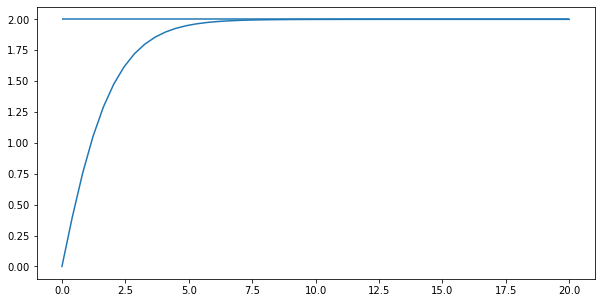

In [6]:
Gc = G/(1+G)
t, y = control.step_response(Gc/s, T=np.linspace(0, 20));
plt.plot(t, t)
plt.plot(t, y)
plt.title('uncompensated step response')

Kv = np.real((control.minreal(s*G).horner(0))[0, 0])
Kv

plt.figure()
t, y = control.step_response(Gc/s, T=np.linspace(0, 20));
plt.plot(t, t-y)
plt.hlines(1/Kv, 0, 20)

In [19]:
Kv = np.real(control.minreal(s*G)(0))
ess = 1/Kv
ess

1 states have been removed from the model


In [20]:
ess/5

## Lead Compensator

In [22]:
H_lead = 8*(s+2)/(s+4)
H_lead

TransferFunction(array([ 8, 16]), array([1, 4]))

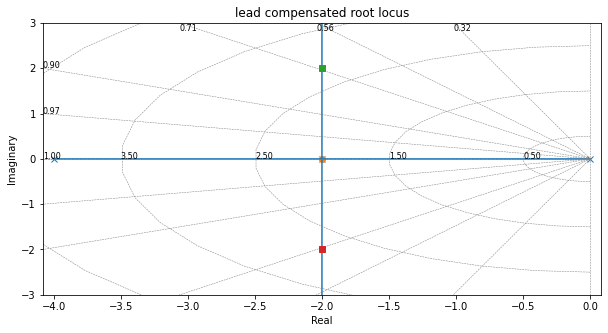

In [23]:
control.rlocus(G*H_lead, ylim=[-3, 3]);
plt.plot(-2, 2, 's')
plt.plot(-2, -2, 's')
plt.title('lead compensated root locus');

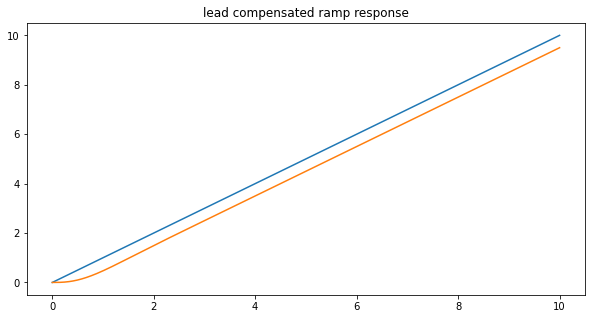

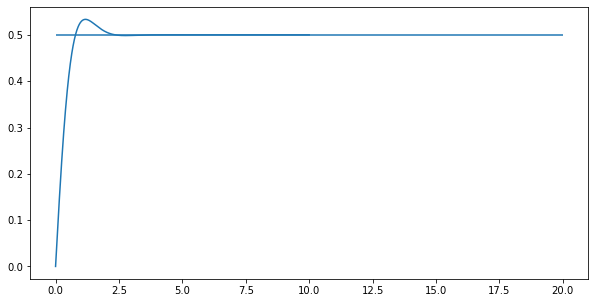

In [25]:
Gc_lead = G*H_lead/(1+G*H_lead)
t = np.linspace(0, 10, 1000)
_, y = control.step_response(Gc_lead/s, T=t);
plt.plot(t, t)
plt.plot(t, y)
plt.title('lead compensated ramp response')

plt.figure()
_, y = control.step_response(Gc_lead/s, T=t);
plt.plot(t, t-y)
plt.hlines(0.5, 0, 20)

## Lead-Lag Compensator

In [26]:
H_lag = (s+0.05)/(s+0.01)
H_lag

TransferFunction(array([1.  , 0.05]), array([1.  , 0.01]))

In [27]:
H = H_lag*H_lead

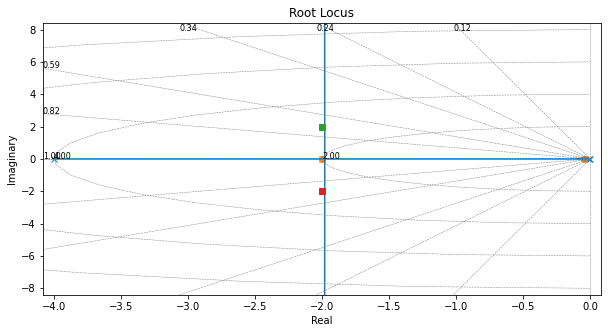

In [28]:
control.rlocus(G*H);
plt.plot(-2, 2, 's')
plt.plot(-2, -2, 's')

In [29]:
control.minreal(G*H_lead*s).horner(0)

2 states have been removed from the model


array([[[2.+0.j]]])

In [30]:
control.minreal(G*H*s).horner(0)

2 states have been removed from the model


array([[[10.+0.j]]])

Text(0.5, 1.0, 'lead-lag compensated ramp response error')

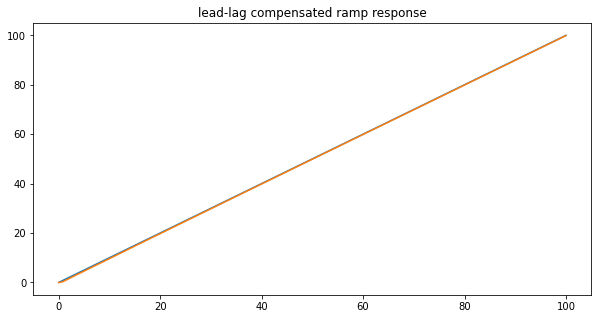

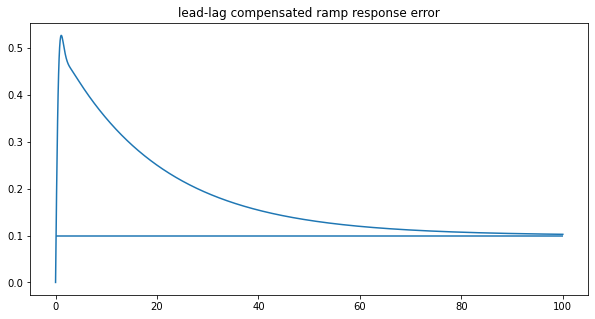

In [31]:
Gc_leadlag = G*H/(1+G*H)
t = np.linspace(0, 100, 1000)
_, y = control.step_response(Gc_leadlag/s, T=t);
plt.plot(t, t)
plt.plot(t, y)
plt.title('lead-lag compensated ramp response')

plt.figure()
plt.plot(t, t - y)
plt.hlines(0.1, t[0], t[-1])
plt.title('lead-lag compensated ramp response error')